In [1]:
!pip install tensorflow-datasets ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.6 MB/s eta 0:00:00


In [2]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3


In [3]:
import tensorflow as tf
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [4]:
for gpu in gpus:
  print(gpu)

In [6]:
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

In [7]:
ds=tfds.load('fashion_mnist',split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteO1BSXM/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteO1BSXM/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [9]:
ds.as_numpy_iterator().next()['image']#Returns an iterator which converts all elements of the dataset to numpy
#setting an iterator is important as the entire dataset is not loaded into memory we keep making calls to retrive the data

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 18],
        [ 77],
        [227],
        [227],
        [208],
        [210],
        [225],
        [216],
        [ 85],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 61],
        [100],
        [ 97],
        [ 80],
        [ 57],
        [117],
        [227],
        [238],
        [115],
        [ 49],
        [ 78],
        [106],
        [108],
        [ 71],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 81],
        [105],
        [ 80],
        [ 69],
      

In [10]:
#Do some data transformation
import numpy as np

In [11]:
#setup connection aka iterator
dataiterator=ds.as_numpy_iterator()

In [13]:
#Getting data out of the pipleline
dataiterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 59],
         [ 77],
         [ 58],
         [ 56],
         [ 58],
         [ 57],
         [ 65],
         [ 89],
         [  2],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [245],
         [213],
         [199],
         [192],
         [188],
         [189],
         [184],
         [226],
         [ 90],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

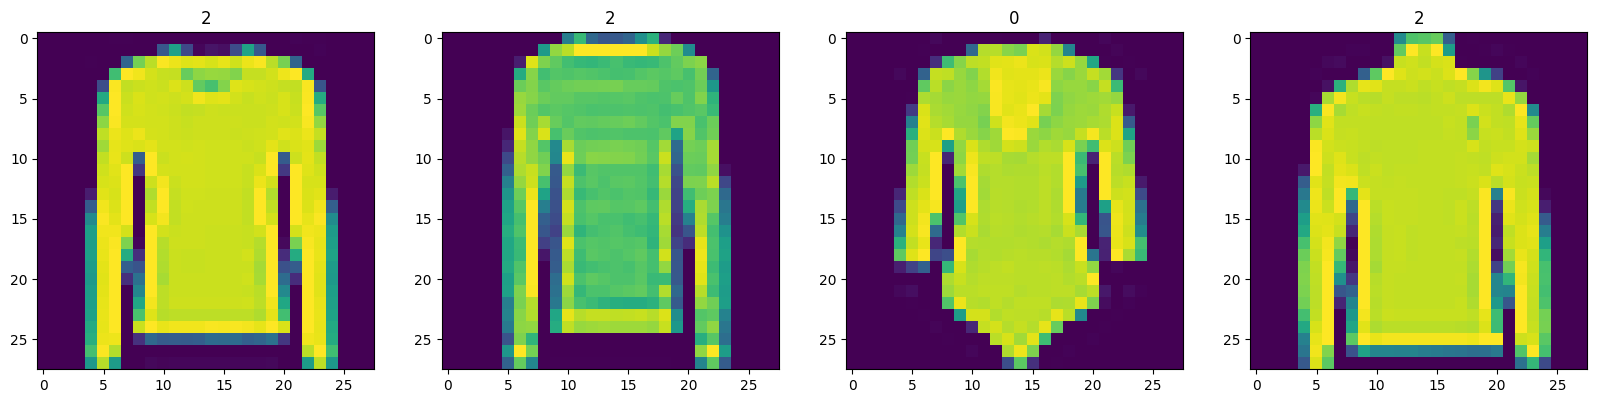

In [15]:
#setting up the subplot formatting
fig,ax=plt.subplots(ncols=4,figsize=(20,20))#fig is the whole thing, ax is each individual subplot

#loop 4 times and get images
for idx in range(4):
  sample=dataiterator.next()
  # sample contains two parts, image and label
  ax[idx].imshow(np.squeeze(sample['image']))# Returns Squeezed: ndarray The input array, but with all or a subset of the dimensions of length 1 removed.
  ax[idx].title.set_text(sample['label'])

In [16]:
#Scale and return images
def scale_images(data):
  image=data['image']#extracting image only from data
  return image/255 #reducing dimensions of image so it trains faster

In [18]:
ds=tfds.load('fashion_mnist',split="train")
#Running dataset through the scale_image preperocessing step
ds=ds.map(scale_images)
#cache the dataset for that batch
ds=ds.cache()
#shuffle it up
ds=ds.shuffle(60000)
#Batch into 128 images
ds=ds.batch(128)
#reduces the likelihood of bottlenecking
ds=ds.prefetch(64)

In [20]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Reshape,LeakyReLU,Dropout,UpSampling2D

In [67]:
def build_generator():
  model=Sequential()
  #Takes in random values and reshapes it into7*7*128
  #Begginings of a generated image
  model.add(Dense(7*7*128,input_dim=128))#7*7*128 as we are passing 128 images at once, the 128 images gives our generator some context as to what to generate
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))

  #Upsampling block1
  model.add(UpSampling2D())#takes the layer and expands the value by 2 and passes it to Conv2D layer
  model.add(Conv2D(128,5,padding='same'))#condenses information and provide some parametric values
  model.add(LeakyReLU(0.2))

   #Upsampling block2
  model.add(UpSampling2D())#takes the layer and expands the value by 2 and passes it to Conv2D layer
  model.add(Conv2D(128,5,padding='same'))#condenses information and provide some parametric values
  model.add(LeakyReLU(0.2))

  #Conv block1
  model.add(Conv2D(128,5,padding='same'))#condenses information and provide some parametric values
  model.add(LeakyReLU(0.2))

  #Conv block2
  model.add(Conv2D(128,5,padding='same'))#condenses information and provide some parametric values
  model.add(LeakyReLU(0.2))

  #conv layer to get one channel
  model.add(Conv2D(1,4,padding="same",activation="sigmoid"))


  return model

In [68]:
generator=build_generator()

In [69]:
generator.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 6272)              809088    
                                                                 
 leaky_re_lu_33 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_8 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_9 (UpSamplin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_34 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                     

In [78]:
img=generator.predict(np.random.randn(4,128,1))

1/1 [==============================] - 0s 168ms/step


In [79]:
img.shape

(4, 28, 28, 1)

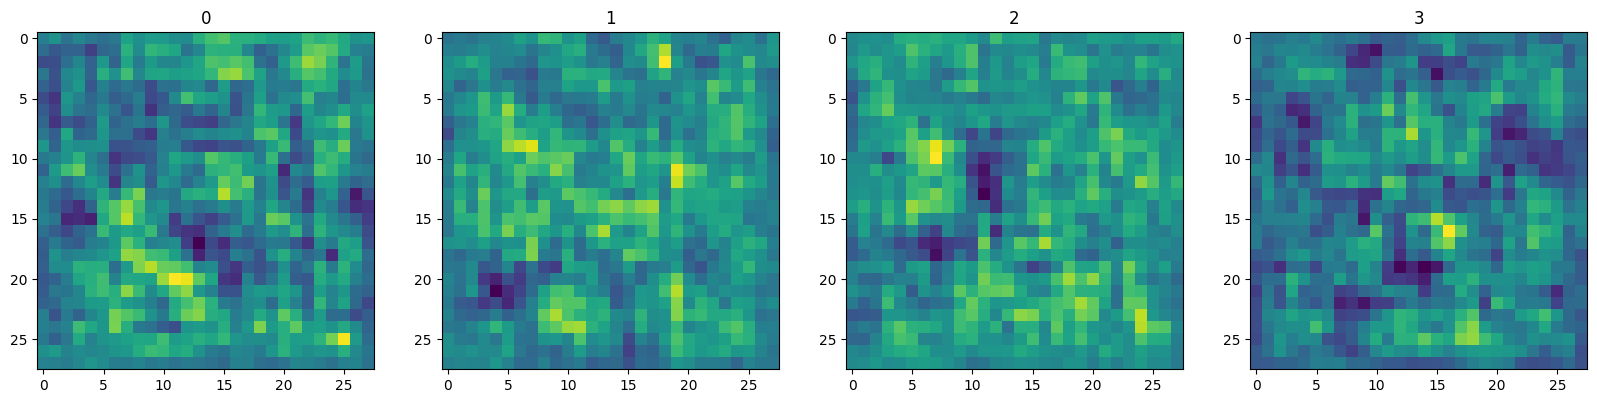

In [72]:
#setting up the subplot formatting
fig,ax=plt.subplots(ncols=4,figsize=(20,20))#fig is the whole thing, ax is each individual subplot

#loop 4 times and get images
for idx,img in enumerate(img):

  # sample contains two parts, image and label
  ax[idx].imshow(np.squeeze(img))# Returns Squeezed: ndarray The input array, but with all or a subset of the dimensions of length 1 removed.
  ax[idx].title.set_text(idx)

In [73]:
def build_discriminator():
  model=Sequential()

  #First Conv block
  model.add(Conv2D(32,5,input_shape=(28,28,1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

 #second Conv block
  model.add(Conv2D(64,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(128,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(256,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #Flatten then pass to dense layer
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1,activation="sigmoid"))

  return model

In [74]:
discriminator=build_discriminator()

In [80]:
discriminator.predict(img)

1/1 [==============================] - 0s 120ms/step


array([[0.4968512 ],
       [0.49711087],
       [0.49696144],
       [0.49681178]], dtype=float32)

In [81]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [83]:
g_opt=Adam(learning_rate=0.0001)
d_opt=Adam(learning_rate=0.00001)
#learning rate of discriminator is slower so it does not beat the generator
g_loss=BinaryCrossentropy()
d_loss=BinaryCrossentropy()

In [84]:
from tensorflow.keras.models import Model

In [99]:
class FashionGAN(Model):
  def __init__(self,generator,discriminator,*args,**kwargs):
    #pass through args and kwargs through base class
    super().__init__(*args,**kwargs)
    self.generator=generator
    self.discriminator=discriminator

  def compile(self,g_opt,d_opt,g_loss,d_loss,*args,**kwargs):
    super().compile(*args,**kwargs)

    self.g_opt=g_opt
    self.d_opt=d_opt
    self.g_loss=g_loss
    self.d_loss=d_loss

  def train_step(self,batch):
    real_images=batch
    fake_images=self.generator(tf.random.normal((128,128,1)),training=False)#not training yet just generating fake images

    #Train the discriminator
    with tf.GradientTape() as d_tape:
      yhat_real=self.discriminator(real_images,training=True)
      yhat_fake=self.discriminator(fake_images,training=True)
      yhat_realfake=tf.concat([yhat_real,yhat_fake],axis=0)#combining sample

      #create labels for real and fake images as this a supervised learning problem
      y_realfake=tf.concat([tf.zeros_like(yhat_real),tf.ones_like(yhat_fake)],axis=0)#fake values have a label of 1

      #add noise to the TRUE outputs to confuse the discrimnator a little bit
      noise_real=0.15*tf.random.uniform(tf.shape(yhat_real))#creating random values in shape of yhat_real
      noise_fake=-0.15*tf.random.uniform(tf.shape(yhat_fake))
      y_realfake+=tf.concat([noise_real,noise_fake],axis=0)

      #calculate loss
      total_d_loss=self.d_loss(y_realfake,yhat_realfake)

    #apply backpropogation - nnlearn
    dgrad=d_tape.gradient(total_d_loss,self.discriminator.trainable_variables)
    self.d_opt.apply_gradients(zip(dgrad,self.discriminator.trainable_variables))

  #train the generator
    with tf.GradientTape() as g_tape:
      #generate new images
      gen_images=self.generator(tf.random.normal((128,128,1)),training=True)

      #Create the predicted labels
      predicted_labels=self.discriminator(gen_images,training=False)

      #Calculate loss - trick to training out fake out the discriminator
      total_g_loss=self.g_loss(tf.zeros_like(predicted_labels),predicted_labels)#want the model to think generated images are real images, so we reward our generator for faking out the discriminator

    #apply backpropogation
    ggrad=g_tape.gradient(total_g_loss,self.generator.trainable_variables)
    self.g_opt.apply_gradients(zip(ggrad,self.generator.trainable_variables))

    return {"d_loss":total_d_loss,"g_loss":total_g_loss}


In [100]:
#build instance of model
fashgan=FashionGAN(generator,discriminator)

In [101]:
#compile model
fashgan.compile(g_opt,d_opt,g_loss,d_loss)

In [102]:
hist=fashgan.fit(ds,epochs=20)

Epoch 1/20
  3/469 [..............................] - ETA: 4:32:39 - d_loss: 0.6925 - g_loss: 0.6866

KeyboardInterrupt: 